# 0115

# 지도학습 &비지도학습
- 가장 큰 차이는 종속변수가 있냐 없냐의 차이 
- 두개모두 data를 벡터와 매트릭스에 넣어줘야 함 
    - 벡터:크기와 방향으로 해석하겠다는 뜻 ( 선형대수?)
    - 벡터가 표현하는 크기(거리)를 이용해 만든 모델이 KNN,KMEANS
- 벡터의 크기값은 직선을 그리고 길이를 이용해 결정 (NORM?)
- 벡터의 방향값은 내적으로 ! A.B =|A||B|cos(theta)
- 벡터 x 매트릭스 : 데이터변환됨 
- 차원축소는 : 특성 추출과 같은 맥락이다 ( 몇몇 변수 추출)

    
#- 벡터가 표현하는 방향을 이용해 만든 모델은 PCA MDS FFNN : - 들어오는 데이터로부터 데이터들간의 상관계수나 공분산을 구한다 (?)
     - PCA는 모델의 전단계에서 사용_ 노이즈 제거용으로 사용 eg)IoT:
                 -차원축소(dimensionality reduction)와 변수추출(feature extraction) 로 자주쓰임
     - MDS는 시각화용도 : 10차원(50x10)처럼 시각화가 불가능할경우 임의의 직계행렬 사용 (10X2행렬):  #데이터 시각화는 아주 중요
                         -10차원 =>2차원: 10차원일떄의 요소를 고려하며 임의의직계행렬사용
                         -분석용으로는 부족하다 
     - FNN :다차원의 행렬을 (50x10)X(10x1) =50x1 : 결과적으로 행렬의 곱을 통해 변수갯수가 10개에서 1개로 변함
                        
#- 고유값 분해하면 고유값과 고유벡터: 서로벡터간 내적 0 -> 정직교


# 비지도학습

- 목적 : 차원축소, target 결정
- 두개모두 data를 벡터와 매트릭스에 넣어줘야 함 
    - 벡터:크기와 방향으로 해석하겠다는 뜻
    - 벡터가 표현하는 크기(거리)를 이용해 만든 모델이 KNN,KMEANS
        -  KMEANS _가까운애들끼리 그룹핑
            - 종속변수가 없다
            - 센터점을 정해준다 
            - 데이터가 들어오면 주위데이터와 거리값 계산 후 가까운 것에 군집
            - 센터점은 계속 이동한다 
        - KNN _
            - 데이터분포를 학습하고 새로운 데이터가 들어오면 근처의 데이터들을 본다(K는 내가결정)
            - 그 근처의 데이터들이 속해있는 그룹으로 군집화 

## Kmeans
 -  KMEANS _가까운애들끼리 그룹핑
     - 종속변수가 없다
     - 센터점을 정해준다 (데이터를 모르는 상태에서)
     - 군집수 결정 _ 이상치영향을 많이 받음 _그래서 평균이아닌 중앙값
     - 데이터가 들어오면 주위데이터와 거리값 계산 후 가까운 것에 군집
     - 센터점은 계속 이동한다 
 - 활용처:
      - 1.종속변수 결정_ 종속변수가 없기때문에 묶여진 그룹을 종속변수로 본다?
      - 2.압축용으로 사용 : eg)이미지에서 많이쓰는 색상을 비슷한것 끼리 군집화 /JPG
                          : 대표색상지정하고 실이미지를 불러올때에는 군집되어있는 것 중하나를 불러온다
      - 3.원형이상치 제거 
      - 4.챗봇 : 모든 질문에대한 답을하면 느려지니까 , 질문 유형별로 그룹핑한다 ( 대충의 덩어리로 나눠준다 )

## KNN
- 속도가 빠르다 (유사도에 의해 비슷한놈으로 메워준다)

# MDS 
시각화/ 차원축소

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
#이미지를 파일로 출력하고 로딩한다음 글씨만 추출
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]
 

이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1532, 2)
원래이미지의 차수  (288, 72)


(-0.11881377209280353,
 4.140158966213945,
 0.02958197717253727,
 1.0142039520339077)

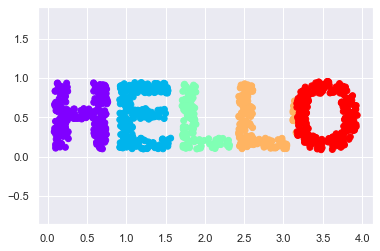

In [3]:
X= make_hello(1000)
colorize = dict(c=X[:,0],cmap=plt.cm.get_cmap('rainbow',5))

plt.scatter(X[:,0],X[:,1],**colorize)
plt.axis('equal')

(1000, 2)
<class 'list'>


(4.597858810380142, 8.755757454950324, 5.020644928025307, 7.258448710811383)

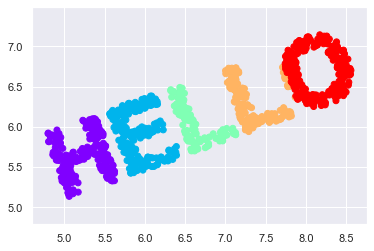

In [4]:
print(X.shape)
def rotate(X,angle): 
    theta = np.deg2rad(angle) #컴퓨터는 라디안으로 바꿔줘야 각도를 알아본다  라디안은 호의길이 
    R = [[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]]  #2차원 회전  #x축 cos  y축 sin _
    print(type(R))
    return np.dot(X,R)  #1000 x 2 * 2x2 => 1000 x 2

X2=rotate(X,20)+5  #그자리에서 돌리면 밑이 잘리니까  절편값 준것 
plt.scatter(X2[:,0],X2[:,1],**colorize)
plt.axis('equal')

In [5]:
#각 점들간의 상호거리 (EUCLIDIAN DISTANCE)
from sklearn.metrics import pairwise_distances #디폴트 -유클리디안거리(피타고라스정의 길이)
D = pairwise_distances(X) # 거리행렬  #x의 거리
print(D.shape) #1000x1000 행렬  정방행렬이면서 대칭행렬  #자기자신거리를 재어서?
D[:5,:5]

(1000, 1000)


array([[0.        , 0.34803471, 0.00916819, 0.0450506 , 0.32637768],
       [0.34803471, 0.        , 0.34018159, 0.30337243, 0.0229946 ],
       [0.00916819, 0.34018159, 0.        , 0.03683646, 0.31841895],
       [0.0450506 , 0.30337243, 0.03683646, 0.        , 0.28158646],
       [0.32637768, 0.0229946 , 0.31841895, 0.28158646, 0.        ]])

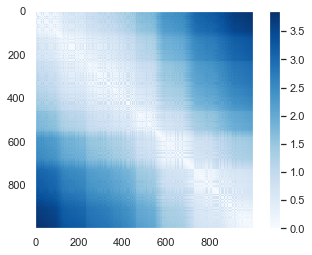

In [6]:
#거리행렬 시각화

plt.imshow(D,zorder =2,cmap='Blues',interpolation = 'nearest')
plt.colorbar()

In [7]:
D2 =pairwise_distances(X2)  #돌아가고있지만 원형을 유지하고있음 True 나와야함
np.allclose(D,D2)

True

[[-0.74494191 -1.70588632]
 [-0.41295504 -1.81002158]
 [-0.73486201 -1.70435097]
 ...
 [ 0.75145058  1.84680917]
 [ 0.4906357   1.9307466 ]
 [ 0.63071876  1.89955864]]


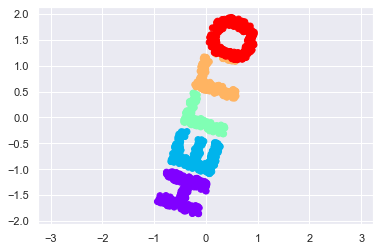

In [8]:
from sklearn.manifold import MDS #manifold 다형체  #차원을 축소해도 모양이 비슷하다 #하나를 여러개의 모양으로 표현가능
#미리 계산된 거리 행렬을 이용해 차원축소함(dissimilarity : precomputed)
model = MDS(n_components=2,dissimilarity ='precomputed', # n+components 요소 2개  
           random_state=1)
out=model.fit_transform(D)
plt.scatter(out[:,0],out[:,1],**colorize)
plt.axis('equal')
print(out)

In [9]:
#고유값 분해
import numpy as np
rng = np.random.RandomState(10)  #초기화 # seed값 : random을 어디서 시작하느냐 
C = rng.randn(3,3) #normal
print(np.dot(C,C.T)) #t는 전치 행렬 , 행렬을 거듭제곱 
#정방행렬이면서 대칭행렬 도출
#eigh 고유값 분해 
e,V = np.linalg.eigh(np.dot(C,C.T)) #
print('eigenvector',V) #고유벡터
print('eigenvalue',e) #고유값

#결과값

#세개의 축이 있고 그 방향으로의 크기
#eigenvector [[-0.15797077 -0.30570231 -0.93893095]
# [ 0.20981122  0.9187662  -0.33443672]
# [ 0.9648961  -0.24982947 -0.08099843]]
#eigenvalue [0.02629875 0.37332691 5.26033253]

#정직교하냐?

np.dot(V[1],V[2]) #두벡터의 내적=> 거의 0이다 : 직교 _ 

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]
eigenvector [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]
eigenvalue [0.02629875 0.37332691 5.26033253]


-3.122502256758253e-17

In [10]:
#2차원 데이터를 3차원으로 표현
def random_projection(X,dimension=3,rseed=42): #랜덤이기 떄문에 #(데이터,차원,시드값)
    assert dimension>= X.shape[1] #차원확대만 가능  #거짓일경우 하기 함수 작동x # 2차원일 때 shape은 행,열값 나온다
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension,dimension) #3 x 3
    print("c는",C.shape)
    print(np.dot(C,C.T)) #C행렬의 제곱  => # 정방이면서 대칭행렬 
    e,V = np.linalg.eigh(np.dot(C,C.T)) #고유값분해  : 고유치와 고유벡터 : 고유백터는 직죠
    print("v는",V.shape) #3x3
    print('차원은',V[:X.shape[1]]) #2차원
    return np.dot(X,V[:X.shape[1]]) #2x3로 바꿔라 #변환
print(X.shape)
print(X.shape[1])
print('데이터의 차원은',X.shape)
X3 = random_projection(X,3)
X3.shape

(1000, 2)
2
데이터의 차원은 (1000, 2)
c는 (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
v는 (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

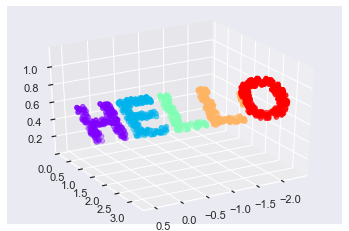

In [11]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:,0],X3[:,1],X3[:,2],
            **colorize)
ax.view_init(azim=60,elev=30) #3차원에서 바라보는 시점을 바꿔주는  

(-1.0390064107727621,
 1.0377133989963219,
 -2.0646660054511297,
 2.135458244484912)

C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


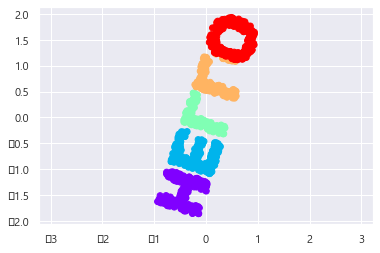

In [32]:
# MDS이용 차원축소

model=MDS(n_components=2,random_state=1)
out3=model.fit_transform(X3)
plt.scatter(out3[:,0],out3[:,1],**colorize)
plt.axis('equal')

ValueError: 'c' argument has 1000 elements, which is not acceptable for use with 'x' with size 12, 'y' with size 12.

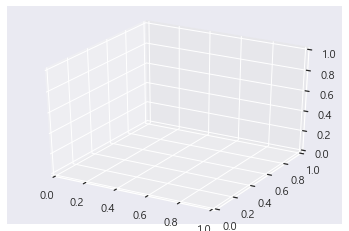

In [33]:
def make_hello_s_curve(X):
    t = (X[:,0]-2)*0.75 *np.pi
    x = np.sin(t)
    y = X[:,1]
    z = np.sign(t) *(np.cos(t)-1)
    return np.vstack((x,y,z)).T

XS = make_hello_s_curve(X)
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:,0],XS[:,1],XS[:,2],**colorize)  #MDS는 비선형에 취약, 선형에느ㅏㄴ 강하지만

#데이터가 비선형 변환 _ 
            

(-1.3226393849603086,
 1.1799486556119945,
 -2.1918230064186113,
 2.3891359457585013)

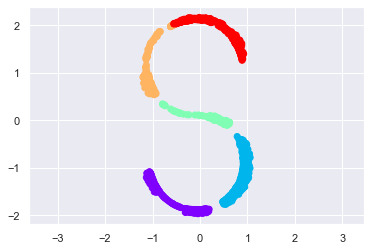

In [14]:
#비선형화한 데이터를 차원축소  #모양유지가 안됨  #MDS는 비선형에서 모양유지가 안됨
model=MDS(n_components=2,random_state=1)
out3=model.fit_transform(XS)
plt.scatter(out3[:,0],out3[:,1],**colorize)
plt.axis('equal')

(0.15, -0.15)

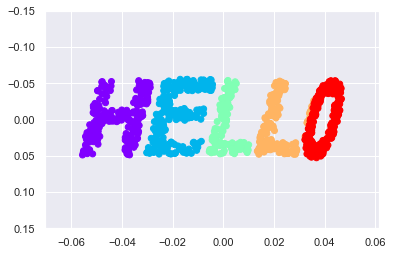

In [15]:
#LLE(Local Linear Embedding) _비선형에 강하다 


from sklearn.manifold import LocallyLinearEmbedding  #근접데이터100개를 확인(n_neighbors=100) 후 2차원으로 바꿔줌
model =LocallyLinearEmbedding(n_neighbors=100,n_components=2,method ='modified',eigen_solver ='dense')

out=model.fit_transform(XS)
fig,ax =plt.subplots()
ax.scatter(out[:,0],out[:,1],**colorize)
ax.set_ylim(0.15,-0.15)

C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 5089

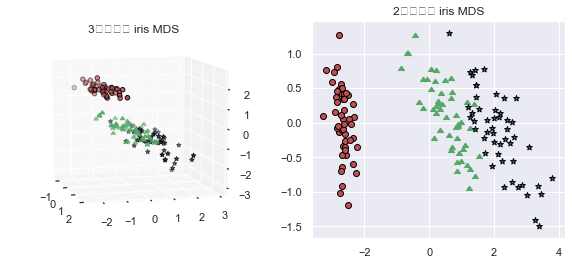

In [16]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import manifold #다형체 
from matplotlib import pylab 
from sklearn.manifold import MDS  
from mpl_toolkits import mplot3d
import os #directory 관리
CHART_DIR ="./"
colors = ['r','g','b']
markers =['o',6,'*']


def plot_iris_mds():
    iris = load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    ax.set_facecolor('white') #바탕색 
    mds = manifold.MDS(n_components=3) #변수 4갠데 3개로 표현
    Xtrans = mds.fit_transform(X)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2], c=color, marker=marker, edgecolor='black')
    pylab.title("3차원에서 iris MDS")
    ax.view_init(10, -15) #카메라 각도 조절 

    mds = manifold.MDS(n_components=2) #2차원
    Xtrans = mds.fit_transform(X) #150 x3 

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, marker=marker, edgecolor='black')
    pylab.title("2차원에서 iris MDS")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight") 
    

plot_iris_mds()

# K MEANS


# KMEANS : 군집분석 => 종속변수결정,
- 압축 : 팔레트, 실제데이터 : 팔레트번호 (256) 1바이트로 표현가능 
- 원형이상치 제거
- 미리 군집화해서 문제해결에 도움을 줌(챗봇)



## 알고리즘 -K 값을 결정 (군집 수 결정), 중심값결정

- 문제점 : 이상치에 민감  EG) 한 값이 저~멀리 떨어져있다면 중심값이 영향을 받을것이다. 

## KMEANS의 척도 : 거리값 (피타고라스 정리 => 유클리디안_euclidian distance)
 => 중심과의 거리
 
 ↓ 대체로 나온 방법 dbscan but kmeans를 더 많이씀
 
### DBSCAN: eps(기본거리값), 최소요소수(군집이되기위한 최소요소)
=> 이웃과의 거리
- 핵심, 경계, 어느 군집에도 속하지 않는 것

In [17]:
import scipy
import sklearn.metrics.pairwise

a_64 =np.array([61.22,71.60,-65.755],dtype =np.float64)
b_64 =np.array([61.22,71.608,-65.72],dtype=np.float64)
a_32 =a_64.astype(np.float32)
b_32 =b_64.astype(np.float32)
 #norm 은 원점으로부터의 크기
dist_64_np = np.array([np.linalg.norm(a_64-b_64)],  # 두개를 빼주면 다른벡터 생성 # 생성된 벡터의 원점으로부터의 거리 
                     dtype=np.float64)

dist_32_np=np.array([np.linalg.norm(a_32 - b_32)],
                   dtype = np.float32)

#유클리디안 distance
dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64],[b_32], metric = 'manhattan')  
 
        #맨하탄은 수평수직으로만 거리잰것  #건물이 있으면 대각으로 못가니까 !
    
from sklearn.metrics.pairwise import euclidean_distances


In [18]:
from sklearn.svm import SVC # Classification 분류 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #kmeans와 PCA는 전처리에 민감  #전처리를 안하면 사이즈 큰놈이 중요한 변수가 됨
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target, random_state=0) #데이터 나누기 

scaler =MinMaxScaler().fit(X_train)  #CHAINING 

X_train_scaled = scaler.transform(X_train) #사이즈가 1인 
svm =SVC()
svm.fit(X_train_scaled,y_train) #피팅
X_test_scaled = scaler.transform(X_test)
print('테스트 점수 :{:.2f}'.format(svm.score(X_test_scaled,y_test)))

테스트 점수 :0.95


C:\Users\ICT01_14\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [19]:
# 격자 : 그물망 
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,10,100],  # 36개의 조합
             'gamma': [0.001,0.01,0.1,1,10,100]}

grid = GridSearchCV(SVC(),param_grid = param_grid, cv =5) #cv : crossvalidation

grid.fit(X_train_scaled,y_train)
print(' 최상의 교차 검증 정확도 : {:.2f}'.format(grid.best_score_))
print('테스트 점수 : {:.2f}'.format(grid.score(X_test_scaled,y_test)))

print('최적의 매개변수:',grid.best_params_)

 최상의 교차 검증 정확도 : 0.98
테스트 점수 : 0.97
최적의 매개변수: {'C': 10, 'gamma': 1}


# 위아래 같은 식 ?

In [20]:
from sklearn.pipeline import Pipeline
pipe =Pipeline([('scaler',MinMaxScaler()),('svm',SVC())]) #이름 지정이유는 파라미터 전달
pipe.fit(X_train,y_train)
print('테스트 점수 : {:.2f}'.format(pipe.score(X_test,y_test)))

테스트 점수 : 0.95


C:\Users\ICT01_14\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# 위아래 같은 식 ?  파이프로 묶어주고 기존식 수정

# pipeline + GridSearchCV 는 다양한 테스트 문제 해결 

# PIPE로 묶어주는게 좋다 

In [21]:
# 격자 : 그물망 
#
from sklearn.model_selection import GridSearchCV
#REGULARIZATION 규제 : 과적합 문제 해결 

param_grid = {'svm__C':[0.001,0.01,0.1,10,100],  # 36개의 조합   #
             'svm__gamma': [0.001,0.01,0.1,1,10,100]}

grid = GridSearchCV(pipe,param_grid = param_grid, cv =5) #cv : crossvalidation

grid.fit(X_train_scaled,y_train)
print(' 최상의 교차 검증 정확도 : {:.2f}'.format(grid.best_score_))
print('테스트 점수 : {:.2f}'.format(grid.score(X_test_scaled,y_test)))

print('최적의 매개변수:',grid.best_params_)

 최상의 교차 검증 정확도 : 0.98
테스트 점수 : 0.97
최적의 매개변수: {'svm__C': 100, 'svm__gamma': 0.1}


array([[5.1875    , 3.6375    ],
       [5.91538462, 2.74807692],
       [6.86904762, 3.09285714],
       [4.76666667, 2.89166667]])

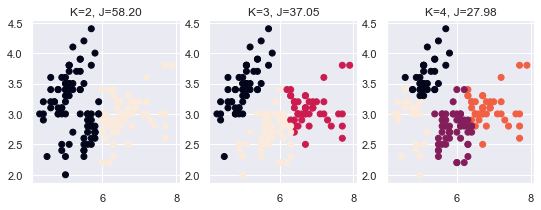

In [22]:
from sklearn import cluster,datasets

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = datasets.load_iris()
X = iris.data[:,:2] #전체변수는 4개이지만 2개로만 군집화한다 
y_iris = iris.target
km2 = cluster.KMeans(n_clusters =2).fit(X)
km3 = cluster.KMeans(n_clusters =3).fit(X)
km4 = cluster.KMeans(n_clusters =4).fit(X)

plt.figure(figsize =(9,3)) ; plt.subplot(131)
plt.scatter(X[:,0],X[:,1],c =km2.labels_) #kmeans를 한 결과 두개로 나누라고함  #색상은(c) kmeans결과의 레이블값(군집번호 )
plt.title('K=2, J=%.2f'% km2.inertia_)  #inertia : 군집 내부거리값
plt.subplot(132); plt.scatter(X[:,0],X[:,1],c=km3.labels_)
plt.title('K=3, J=%.2f'% km3.inertia_)
plt.subplot(133); plt.scatter(X[:,0],X[:,1],c=km4.labels_)
plt.title('K=4, J=%.2f'% km4.inertia_) #중심값 네개 

#중심값 출력
km4.cluster_centers_


# clustering

In [23]:
#초기 중심값이 결정 입력 => 중심을 지속적으로 변히ㅏㅁ
#제대로 나눴는지 아닌지 확인하는게 중심에서의 거리 
from sklearn import cluster,datasets
import matplotlib.pyplot as plt


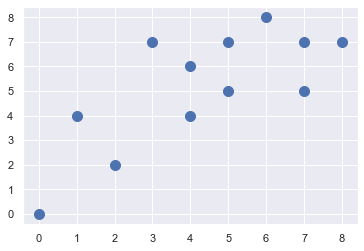

In [24]:
X= np.array([[7,5],[5,7],[7,7],[4,4],[4,6],[1,4],[0,0],[2,2],[8,7],[6,8],[5,5],[3,7]]) #12x2

plt.scatter(X[:,0],X[:,1],s=100)
plt.show()

12


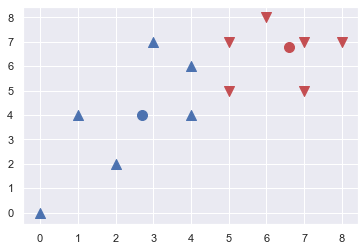

In [25]:
#clustering
#레이블 : 군집번호 : 종속변수 
from sklearn.cluster import KMeans

model=KMeans(n_clusters=2,init='random',n_init=1,max_iter=1,random_state=1).fit(X)
c0,c1=model.cluster_centers_

print(len(model.labels_))
#boolean index  
                     #label 이 0인 애만 True
plt.scatter(X[model.labels_==0,0],X[model.labels_==0,1],s = 100, marker ='v',c='r')

plt.scatter(X[model.labels_==1,0],X[model.labels_==1,1],s = 100, marker ='^',c='b')

plt.scatter(c0[0],c0[1],s=100,c='r')

plt.scatter(c1[0],c1[1],s=100,c='b')
plt.show()

# 양자화 

In [36]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [27]:
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [28]:
n_colors =64
#1바이트 = 8비트 = 2^8 가지 표현가능 = 256개
china = load_sample_image('flower.jpg') #숫자로 되어있다 RGB (256칼라 : 1바이트)
#컬러값 정규화  0~1 정규화 
china = np.array(china,dtype=np.float64)/255

In [29]:
# 세개인 이유 : 이미지 사이즈가 행X열로 있고 나머지 하나는 행과열의 픽셀의 색깔
w,h,d = original_shape =tuple(china.shape) 
print(w,h,d)
assert d ==3 # RGB만 들어와라 
image_array = np.reshape(china,(w*h,d)) #계산을 쉽게하려고 2차원으로 변경해줌 

# 427 x 640 , 3

427 640 3


In [30]:
image_array_sample = shuffle(image_array,random_state=0)[:1000]  #섞고 천개 뽑아라 
#64개 컬러로 그룹핑 
#64개의 컬러를 만들고 가까운놈들을 모아 라벨링한다 
kmeans = KMeans(n_clusters=n_colors,random_state=9).fit(image_array_sample) #천개 행을 피팅해라   #중심값 결정 64

In [37]:
labels = kmeans.predict(image_array) #라벨값은 0~64개 사이   : 중심이 64개라서   427x640



In [38]:
def recreate_image(codebook, labels, w,h): #코드북은 64컬러값을 의미함 _ #이미지의 픽셀수만큼 레이블이 들어옴
    d=codebook.shape[1] # 64개의 중심값  64 x 3
    image=np.zeros((w,h,d)) # 원래이미지 사이즈
    label_idx=0
    for i in range(w):#돌아가면서 하나씩 다 채워야함
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx +=1
    return image

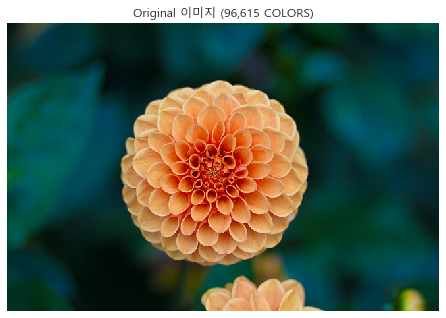

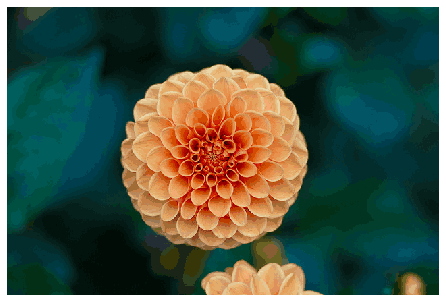

In [39]:
plt.figure(1)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original 이미지 (96,615 COLORS)') 
plt.imshow(china)
plt.figure(2)
plt.clf()
ax = plt.axes([0,0,1,1])
plt.axis('off')
plt.imshow(recreate_image(kmeans.cluster_centers_,labels,w,h))

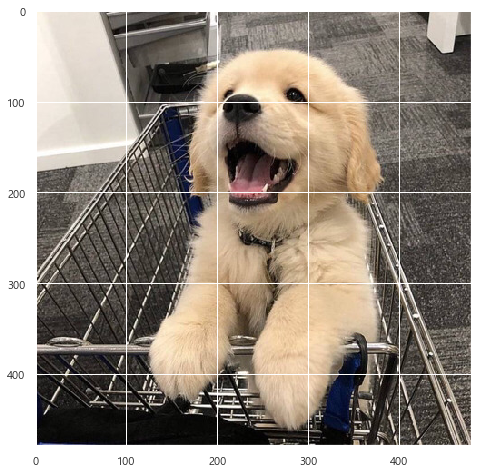

In [40]:
image = plt.imread('dog.jpg')
plt.figure(figsize =(15,8))
plt.imshow(image)

In [41]:
#사이즈
image.shape



(479, 480, 3)

In [42]:
#전체 바이트 수  _ 전체다 곱하기
image.shape[0] * image.shape[1] * image.shape[2]

689760

In [43]:
x,y,z = image.shape
image = np.array(image,dtype=np.float64) /255
image_2d = image.reshape(x*y,z) #kmeans에서 차수줄여줘야하는 이유는 , kmeans는 3차원을 이해하지못한다 
image_2d.shape

(229920, 3)

In [44]:
kmeans_cluster =cluster.KMeans(n_clusters=16)  #중심값은 16개 만들어져야함 
kmeans_cluster.fit(image_2d)
cluster_centers = kmeans_cluster.cluster_centers_
cluster_centers

array([[0.82651447, 0.709948  , 0.57641361],
       [0.36113177, 0.33469699, 0.30755227],
       [0.0489494 , 0.04417143, 0.04497897],
       [0.96190168, 0.93237451, 0.89355343],
       [0.64459149, 0.53039417, 0.41290405],
       [0.72435937, 0.68564535, 0.64452625],
       [0.29180395, 0.26815687, 0.24605144],
       [0.50964091, 0.47498597, 0.43868456],
       [0.13302734, 0.12058211, 0.1231067 ],
       [0.87117109, 0.83797738, 0.79859134],
       [0.73783898, 0.62439809, 0.50079989],
       [0.95721463, 0.85095787, 0.71343653],
       [0.59418607, 0.56044108, 0.52625979],
       [0.22162198, 0.19949813, 0.18141252],
       [0.89739898, 0.77981013, 0.64143057],
       [0.43609155, 0.40367428, 0.36977631]])

In [46]:
len(cluster_centers) # 중심 16개 

16

In [47]:
cluster_centers.shape

(16, 3)

In [48]:
#레이블은

cluster_labels = kmeans_cluster.labels_
cluster_labels

array([ 3,  3,  3, ..., 12,  5, 12])

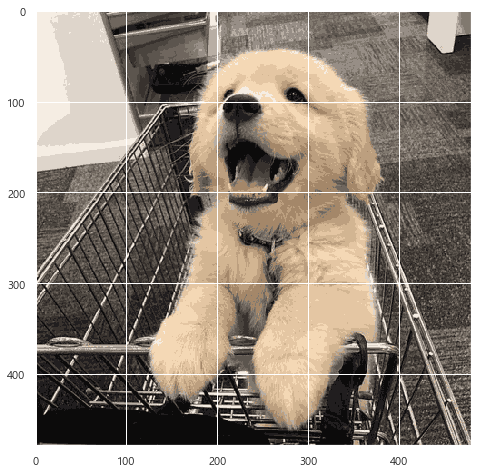

In [49]:
plt.figure(figsize=(15,8))

plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))

# 원형 이상치 제거

In [50]:
from sklearn.datasets import make_blobs
X,label = make_blobs(100,centers=1)

In [51]:
kmeans =KMeans(n_clusters =1) #중심 1개 
kmeans.fit(X)
distances = kmeans.transform(X) #각데이터의 중심으로 부터 거리값으로 변환
#RAVEL () 1차원 변형  #ARGSORT :'인덱스'를  SORT해라  _ 거리값을 내림차순?? #값이 기준이 아닌 이유 : 인덱스를 통해 다른걸 제어하기위해
sorted_idx = np.argsort(distances.ravel())[::-1][:5]  # [::-1] 내림차순 ':: 은 간격'

C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_14\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


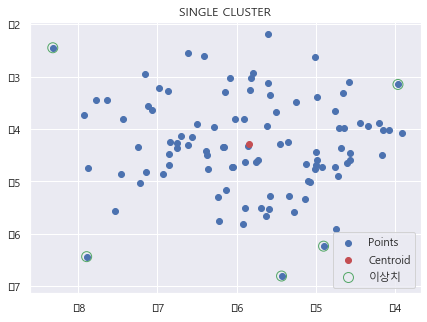

In [52]:
f,ax = plt.subplots(figsize=(7,5))
ax.set_title('SINGLE CLUSTER')
ax.scatter(X[:,0],X[:,1],label='Points')
ax.scatter(kmeans.cluster_centers_[:,0],  #센터점 찍기
           kmeans.cluster_centers_[:,1],
           label = 'Centroid',color='r')
ax.scatter(X[sorted_idx][:,0],
           X[sorted_idx][:,1],
           label='이상치',edgecolors='g',
           facecolors='none',s=100)

ax.legend(loc='best')
           

# PCA 주성분 분석 

### 모델 입력 전에 특징추출 (noise 제거)

### PCA 결과를 모델의 변수로 추가하면 정확도 상승


# 차원축소 후에 분석을 하면 좋은 점

- noise 제거
- 속도개선
- 차원의 저주 => 복잡한 문제를 해결

In [53]:
import numpy as np
from sklearn.decomposition import PCA

X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])  #샘플 6개 ,  변수 2개

pca =PCA(n_components=2)  #주성분을 2개로 해라    #주성분 중 첫번째 것이 가장 큰 영향

#고유값 분해를 통해 나온 축은 원래데이터와는 다르다 _ 모든 변수가 조합해서 만들어 낸 축
#주성분 축은 별도로 생성된다
#츅이름을 재 명명해야함

print(pca.fit(X))
print(pca.explained_variance_ratio_) #설명력  # [0.99244289 0.00755711] 앞에거가 첫번째 주성분의 설명력


print(pca.explained_variance_)  #분산이 큰게 주성분

print(pca.noise_variance_)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
[0.99244289 0.00755711]
[7.93954312 0.06045688]
0.0


In [54]:
# svd 희소행렬 특징 추출, 비정방 행렬인 경우 사용
pca = PCA(n_components=2, svd_solver='full') # 500x500 이상일경우 randomized.arpack  사이즈가 아주크면 랜덤으로 !  arpack 0을줄여서출력?
                                      #full은 전체 다 계산

#singular value decomposition

pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [55]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.feature_names)
print(type(cancer))
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target, random_state=1)

print(type(X_train))
print(X_train.shape)
print(X_train.dtype)
print(X_test.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(426, 30)
float64
(143, 30)


In [56]:
# scaling 안했을 때
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train,y_train)
print("테스트 세트 정확도 : {:.2f}".format(svm.score(X_test,y_test)))

테스트 세트 정확도 : 0.62


C:\Users\ICT01_14\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [59]:
# scaler한거~
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled,y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


C:\Users\ICT01_14\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer(0)
scaler =StandardScaler()
scaler.fit(cancer.data)
X_scaled =scaler.transform(cancer.data)
                      

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]
원본데이터형태 :(569, 30)
축소된 데이터 형태 : (569, 30)


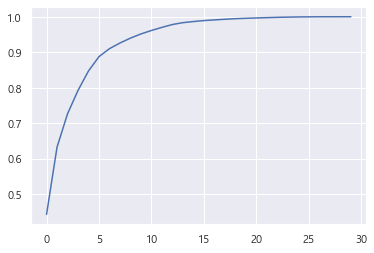

In [61]:
pca = PCA(n_components=30)
pca.fit(X_scaled)
##2개의 주성분 출력

X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_)

print('원본데이터형태 :{}'.format(str(X_scaled.shape)))
print('축소된 데이터 형태 : {}'.format(str(X_pca.shape)))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

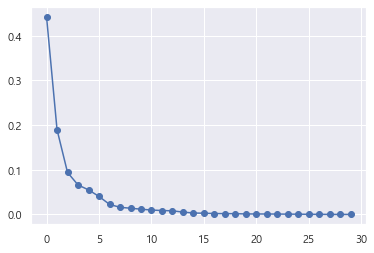

In [62]:
plt.plot(pca.explained_variance_ratio_,'bo-')

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  #정규화

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.decomposition import PCA

pca = PCA(n_components=6)   #전체변수 30개
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)

svm.fit(X_t_train,y_train)
print("정확도:{:.2f}".format(svm.score(X_t_test,y_test))) 


# 변수6개 92% / 변수9개 94%/ 변수15개 94% /변수20개  95% /변수30개 97%

#15개나 추가하고 3%만 상승하니 이것은 낭비

정확도:0.92


C:\Users\ICT01_14\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [64]:
print('PCA 주성분 형태 :{}'.format(pca.components_.shape))

# PCA 주성분 형태 :(6, 30)  => 주성분을 30개의 변수가 설명 

#새로 만들어진 축을 이름지어주기  

#이름은  변수의 기여도에 따라 명명식

PCA 주성분 형태 :(6, 30)


In [65]:
print('PCA 주성분 형태 :{}'.format(pca.components_))  #6개 덩어리 출력




PCA 주성분 형태 :[[ 2.27727952e-01  1.15125429e-01  2.34880866e-01  2.29368295e-01
   1.34257906e-01  2.37160022e-01  2.57472643e-01  2.60831732e-01
   1.28883480e-01  4.44771262e-02  2.05926703e-01  1.45035459e-02
   2.10480600e-01  2.02438009e-01  1.01867571e-02  1.64939913e-01
   1.53175867e-01  1.78415012e-01  2.46122358e-02  9.25782919e-02
   2.32908159e-01  1.12324737e-01  2.40809688e-01  2.29457569e-01
   1.22454525e-01  2.08303026e-01  2.29910791e-01  2.49291962e-01
   1.15240250e-01  1.26763277e-01]
 [-2.15362267e-01 -6.01602111e-02 -1.97386080e-01 -2.12242935e-01
   1.93714685e-01  1.61665826e-01  6.56584195e-02 -2.40618685e-02
   1.88332406e-01  3.77871193e-01 -9.33235914e-02  1.04195564e-01
  -8.12542149e-02 -1.40402031e-01  2.19281447e-01  2.51896246e-01
   2.15694850e-01  1.53310362e-01  1.93854431e-01  3.02040600e-01
  -2.10358120e-01 -5.51038409e-02 -1.91044086e-01 -2.09342024e-01
   1.56961739e-01  1.32043594e-01  8.62556801e-02 -1.22824865e-02
   1.09276647e-01  2.71509521

In [ ]:
plt.matshow(pca.components_,cmap='viridis')

plt.colorbar()  # 4번째 성분에대해서 노란값(가장높음)  2개 있음

(87, 65)


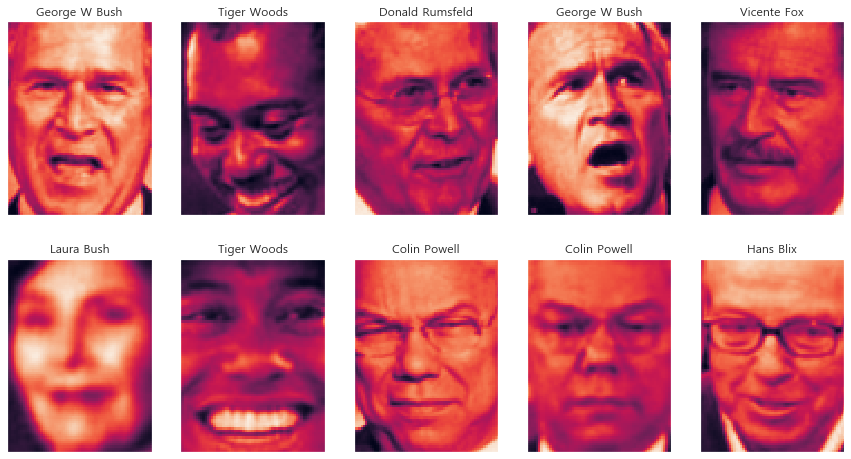

In [66]:
%matplotlib inline
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(image_shape) # 87*65 , 이미지를 가로x세로, 행렬 행부터
fig, axes = plt.subplots(2,5,figsize = (15,8),
                        subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images,
                            axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [67]:
print('이미지사이즈:{}'.format(people.images.shape))
print('클래스 개수 : {}'.format(len(people.target_names)))

이미지사이즈:(1875, 87, 65)
클래스 개수 : 26


In [71]:
mask = np.zeros(people.target.shape,dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people /255

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=0)

In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_train_pca = pca.transform(X_test)

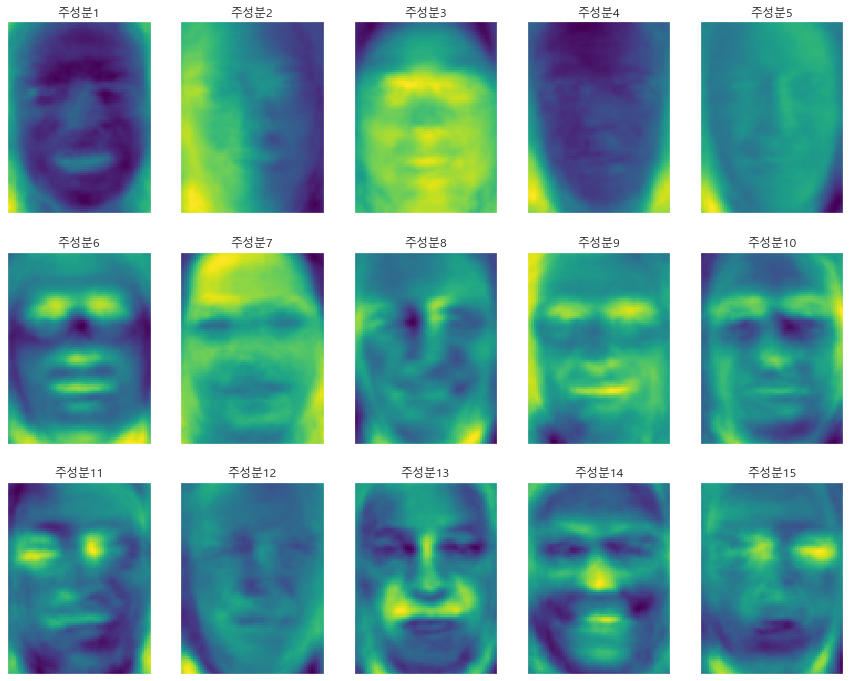

In [76]:
fig, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks' : (), 'yticks' : ()})
for i, (component, ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("주성분{}".format((i+1)))

In [ ]:
# 컴퓨터가 주성분 분석을 통해 찾아낸 주성분
# 100개 합하여 출력 원본이미지를 복원 => ANN 의 가중치 특징도 